In [1]:
import sys; sys.path.append("../") # For relative imports

from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

This notebook creates the main line plots of various metrics for each datset and score function combination.

**Note**: Before running this notebook, run `sh run_experiment.sh`.

In [2]:
save_folder = '../.cache/paper/varying_n'
dataset_list = ['imagenet', 'cifar-100', 'places365', 'inaturalist']
cal_sampling_list = ['random']
n_list = [10, 20, 30, 40, 50, 75, 100, 150]
score_function_list = ['softmax', 'APS', 'RAPS']
method_list = ['standard', 'classwise', 'cluster_random', 
               'exact_coverage_standard', 'exact_coverage_classwise', 'exact_coverage_cluster']
metric_list = ['class_cov_gap', 'avg_set_size', 'very_undercovered']

expected_num_seeds = 10

In [3]:
# Set plot settings
sns.set_style(style='white', rc={'axes.spines.right': False, 'axes.spines.top': False})
sns.set_palette('pastel')
sns.set_context('paper') # 'paper', 'talk', 'poster'

In [4]:
# Helper function to check which results are missing. If nothing prints, all results exist! 
def check_for_missing_results(save_folder, dataset_list, cal_sampling_list, 
                              n_list, score_function_list, method_list,
                              expected_num_seeds=10):
    '''
    Check if results exist for all combinations of settings
    '''
    for dataset in dataset_list:
        for cal_sampling in cal_sampling_list:
            for n_totalcal in n_list: 
                for score_function in score_function_list:
                    for seed in range(expected_num_seeds):
                        pth = os.path.join(save_folder,
                                           f'{dataset}/{cal_sampling}_calset/n_totalcal={n_totalcal}/score={score_function}/seed={seed}_allresults.pkl')
                    
                        try:
                            with open(pth, 'rb') as f:
                                results = pickle.load(f)
                                
                            for method in method_list:
                                if method not in results.keys():
                                    print(f'{method} is missing in {pth}')
                        except:
                            print(f'Missing file {pth}')
                                
check_for_missing_results(save_folder, dataset_list, cal_sampling_list, 
                              n_list, score_function_list, method_list,
                              expected_num_seeds=10)

If any results are missing, you can rerun individual experiments using a command like 
`python run_experiment.py imagenet 100 -score_functions APS RAPS -methods standard classwise cluster_random exact_coverage_standard exact_coverage_classwise exact_coverage_cluster -seeds 0 1 2 3 4 5 6 7 8 9 &`

# Single plots
Useful for previewing all results

In [5]:
def make_varying_n_plot(dataset, score_function, 
                        n_list = [10, 20, 30, 40, 50, 75, 100], 
                        save_folder='../.cache/paper/varying_n',
                        metric_list = ['class_cov_gap', 'avg_set_size'],
                        cal_sampling = 'random',
                        metric_to_name = {'class_cov_gap': 'CovGap', 'avg_set_size': 'AvgSize', 'very_undercovered': 'Fraction very undercovered'},
                        method_list = ['standard', 'classwise', 'classwise_default_standard', 'cluster_balanced'],
                        dataset_to_name = {'imagenet': 'ImageNet', 'cifar-100': 'CIFAR-100', 
                       'places365': 'Places365', 'inaturalist': 'iNaturalist'}): 

    # 1) Compute aggregated_results dict
    aggregated_results = initialize_dict(metric_list, method_list)

    for n_totalcal in n_list:

        curr_folder = f'{save_folder}/{dataset}/{cal_sampling}_calset/n_totalcal={n_totalcal}/score={score_function}'

        print(curr_folder)
        df = average_results_across_seeds(curr_folder, print_results=False, 
                                          display_table=False, methods=method_list, max_seeds=10) # Only use at most 10 seeds

#         display(df)
        for metric in metric_list:

            for method in method_list:

                for suffix in ['mean', 'se']: # Extract mean and SE

                    aggregated_results[f'{metric}_{suffix}'][method].append(df[f'{metric}_{suffix}'][df['method']==method].values[0])
    
    # 2) Make plot 
    for metric in metric_list:

            for method in method_list:
                x = n_list
                y = np.array(aggregated_results[f'{metric}_mean'][method])
                se = np.array(aggregated_results[f'{metric}_se'][method])
                plt.plot(x, y, '-o', label=method, alpha=1)
                # Add 95% error bars
                plt.fill_between(x, y-1.96*se, y+1.96*se, alpha=0.4)

            plt.xlabel('Average number of examples per class')
            plt.ylabel(metric_to_name[metric])
            plt.title(f'{dataset_to_name[dataset]}, {score_function} ({cal_sampling} calibration set)')
            plt.legend()
            if metric == 'class_cov_gap':
                plt.ylim(1,9)
            if metric == 'avg_set_size':
                plt.ylim(0,20)
                
            plt.xscale('squareroot')
            plt.xlim(left=8)
            
            plt.xticks(n_list)
            plt.show()

../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=10/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=20/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=30/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=40/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=50/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=75/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=100/score=softmax
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=150/score=softmax


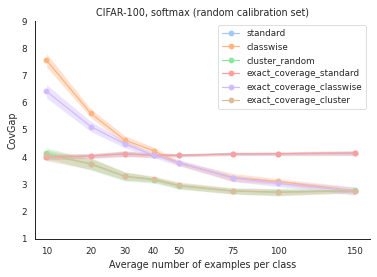

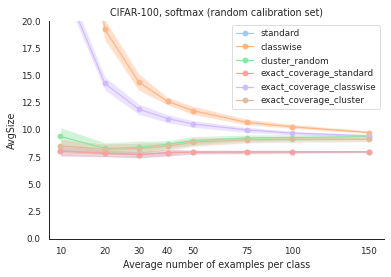

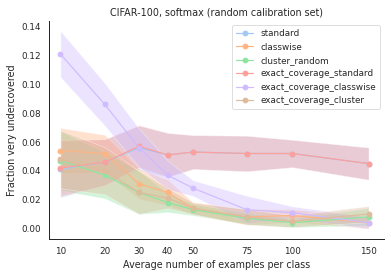

../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=50/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=75/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=100/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=150/score=APS


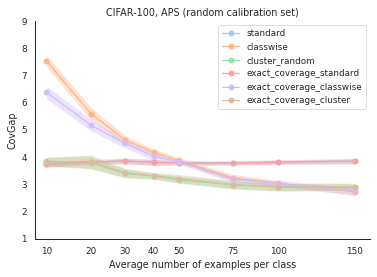

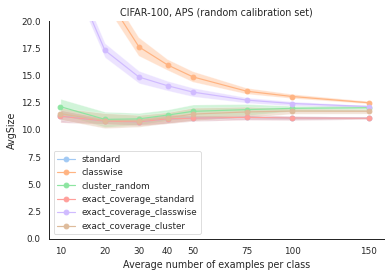

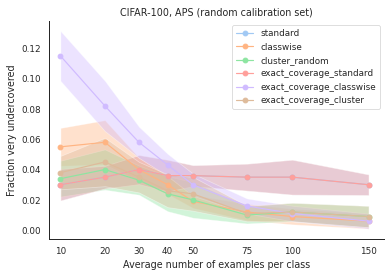

../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=50/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=75/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=100/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=150/score=RAPS


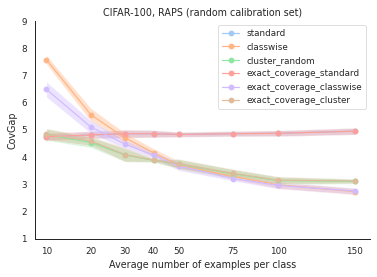

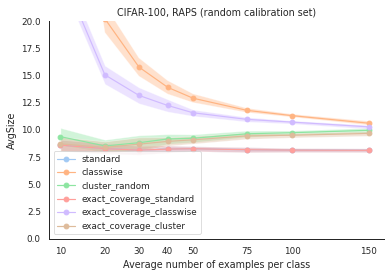

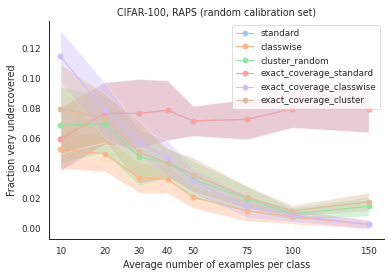

../.cache/paper/varying_n/places365/random_calset/n_totalcal=10/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=20/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=30/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=40/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=50/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=75/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=100/score=softmax
../.cache/paper/varying_n/places365/random_calset/n_totalcal=150/score=softmax


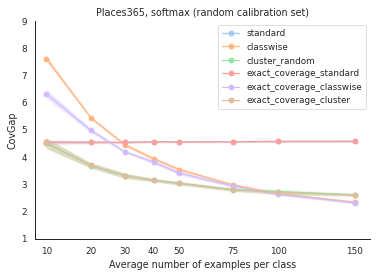

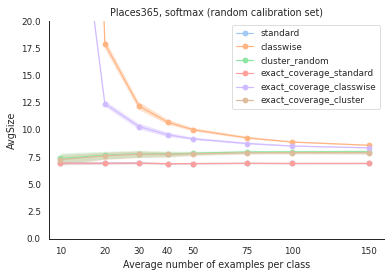

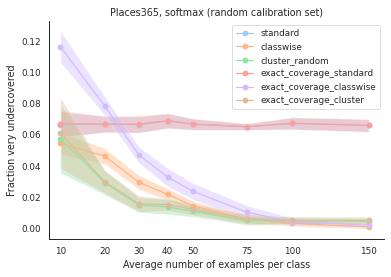

../.cache/paper/varying_n/places365/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=50/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=75/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=100/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=150/score=APS


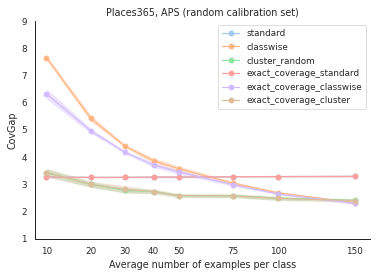

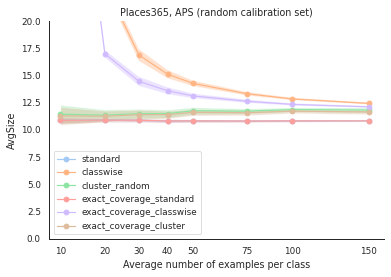

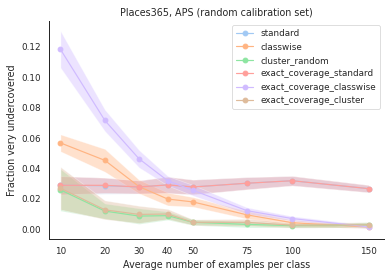

../.cache/paper/varying_n/places365/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=50/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=75/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=100/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=150/score=RAPS


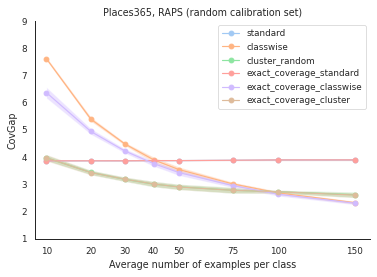

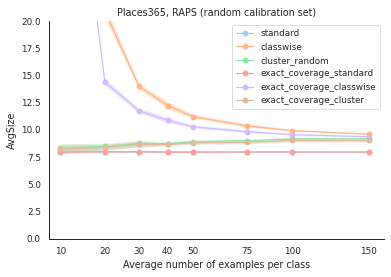

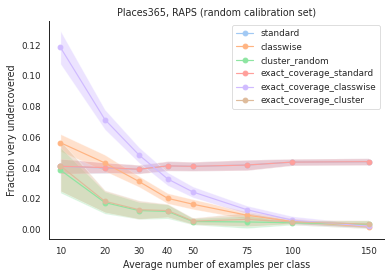

In [6]:
for cal_sampling in cal_sampling_list:
    for dataset in ['cifar-100', 'places365']:
        for score_function in score_function_list:
            make_varying_n_plot(dataset, score_function, n_list=n_list, cal_sampling=cal_sampling,
                                metric_list=metric_list, method_list=method_list)

# for cal_sampling in cal_sampling_list:
#     for dataset in dataset_list:
#         for score_function in score_function_list:
#             make_varying_n_plot(dataset, score_function, n_list=n_list, cal_sampling=cal_sampling,
#                                 metric_list=metric_list, method_list=method_list)

# Combined plots

Here, we organize some plots together for the purposes of the paper

In [7]:
# method_to_name = {'standard': 'Standard', 
#                   'classwise': 'Classwise',
#                   'cluster_random': 'Clustered'}

method_to_name = {'standard': 'Standard', 
                  'classwise': 'Classwise',
                  'cluster_random': 'Clustered',
                  'exact_coverage_classwise': 'Randomized Classwise',
                  'exact_coverage_cluster': 'Randomized Clustered'}

metric_to_name = {'class_cov_gap': 'CovGap', 'avg_set_size': 'AvgSize', 'very_undercovered': 'FracUnderCov'}     

dataset_to_name = {'imagenet': 'ImageNet', 'cifar-100': 'CIFAR-100', 
                       'places365': 'Places365', 'inaturalist': 'iNaturalist'}

In [8]:
def make_line_plot(aggregated_results, ax, 
                        n_list = [10, 20, 30, 40, 50, 75, 100, 150],
                        metric_to_name = {'class_cov_gap': 'CovGap', 'avg_set_size': 'AvgSize', 'very_undercovered': 'FracUnderCov'},
                        method_list = ['standard', 'classwise', 'cluster_random'],
                        dataset_to_name = {'imagenet': 'ImageNet', 'cifar-100': 'CIFAR-100', 
                       'places365': 'Places365', 'inaturalist': 'iNaturalist'}):

    print(f'{dataset_to_name[dataset]}, {score_function} ({cal_sampling} calibration set)')

    for method in method_list:
        x = n_list
        y = np.array(aggregated_results[f'{metric}_mean'][method])
        se = np.array(aggregated_results[f'{metric}_se'][method])
        ax.plot(x, y, '-o', label=method_to_name[method], alpha=1)
        # Add 95% error bars
        ax.fill_between(x, y-1.96*se, y+1.96*se, alpha=0.4)

        ax.set_xlabel('$n_{avg}$', fontsize=FONT_SIZE)


    ax.set_xscale('squareroot')
    ax.set_xlim(left=8)
    
    if metric == 'class_cov_gap':
        ax.set_ylim(1,9)
#     if metric == 'avg_set_size':
#         ax.set_ylim(0,40)

    ax.set_xticks(n_list)
    ax.tick_params(labelsize=FONT_SIZE-2) # Adjust tick label font size


### ImageNet softmax + APS plots

../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=75/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=100/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=150/score=APS
ImageNet, APS (random calibration set)
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=RAPS
../.c

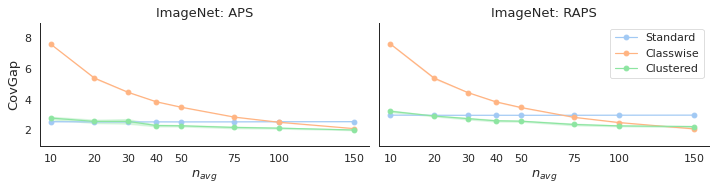

In [9]:
FONT_SIZE = 13

metric = 'class_cov_gap' 
fig_folder = '/home/tding/code/class-conditional-conformal/figs/'

dataset = 'imagenet'
cal_sampling = 'random'

# Side-by-side plots
ncols = 2
fig, axs = plt.subplots(1,ncols, 
                        gridspec_kw={'wspace':0.03},
                        figsize=(12, 2.25)) 

# for i, score_function in enumerate(['softmax', 'APS']):
score_function_list = ['APS', 'RAPS']
for i, score_function in enumerate(score_function_list):
    # Get data
    aggregated_results = get_metric_df(dataset, cal_sampling, metric, score_function, method_list=method_list)

    # Plot
    make_line_plot(aggregated_results, axs[i])
    
#     save_to = os.path.join(fig_folder, f'{dataset}_{cal_sampling}calset_{score_function}.pdf')
   
# Remove yticks for all but left-most axis
for i in range(1, ncols):
    axs[i].set_yticks([])
 
axs[0].set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
axs[0].set_title(f'ImageNet: {score_function_list[0]}', fontsize=FONT_SIZE)
axs[1].set_title(f'ImageNet: {score_function_list[1]}', fontsize=FONT_SIZE)
axs[-1].legend(fontsize=FONT_SIZE-2) # Only show legend on right-most plot


    
save_to = os.path.join(fig_folder, f'{dataset}_{cal_sampling}calset_combined.pdf')
print(f'Saved plot to {save_to}')
plt.savefig(save_to, bbox_inches='tight')

plt.show()

### softmax and APS plots for remaining datasets

../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=50/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=75/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=100/score=APS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=150/score=APS
CIFAR-100, APS (random calibration set)
../.cache/paper/varying_n/places365/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=50/score=

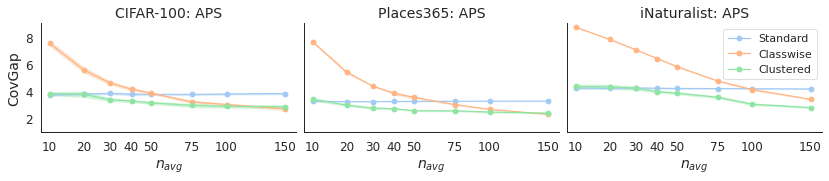

../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=50/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=75/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=100/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=150/score=RAPS
CIFAR-100, RAPS (random calibration set)
../.cache/paper/varying_n/places365/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/places365/random_calset/n_total

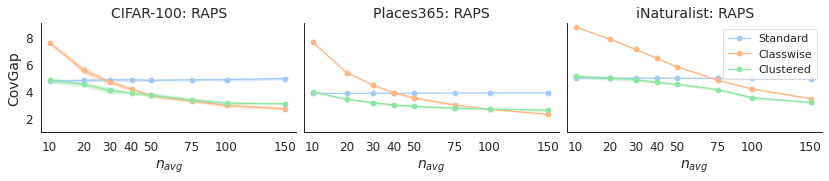

In [10]:
FONT_SIZE = 14

metric = 'class_cov_gap' 
fig_folder = '/home/tding/code/class-conditional-conformal/figs/'

cal_sampling = 'random'
dataset_list = ['cifar-100', 'places365', 'inaturalist']

# ==== PLOT 1a and 1b ==== 
score_function_list = ['APS', 'RAPS']
for score_function in score_function_list:
    
    ncols = len(dataset_list)
    fig, axs = plt.subplots(1,ncols, 
                        gridspec_kw={'wspace':0.03},
                        figsize=(14, 2)) 
    
    for i, dataset in enumerate(dataset_list):

        aggregated_results = get_metric_df(dataset, cal_sampling, metric, score_function)

        # Plot
        make_line_plot(aggregated_results, axs[i])
        axs[i].set_title(f'{dataset_to_name[dataset]}: {score_function}', fontsize=FONT_SIZE)
    
    # Remove yticks for all but left-most axis
    for i in range(1, ncols):
        axs[i].set_yticks([])

    axs[0].set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
    axs[-1].legend(fontsize=FONT_SIZE-3) # Only show legend on right-most plot
    
    save_to = os.path.join(fig_folder, f'last3datasets_{cal_sampling}calset_{score_function}.pdf')
    plt.savefig(save_to, bbox_inches='tight')
    print(f'Saved figure to {save_to}')
    
    plt.show()

## RAPS CovGap plots

../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=75/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=100/score=RAPS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=150/score=RAPS
ImageNet, RAPS (random calibration set)
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=10/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=20/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=30/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=40/score=RAPS
../.cache/paper/varying_n/cifar-100/random_calset/n_totalcal=50/sc

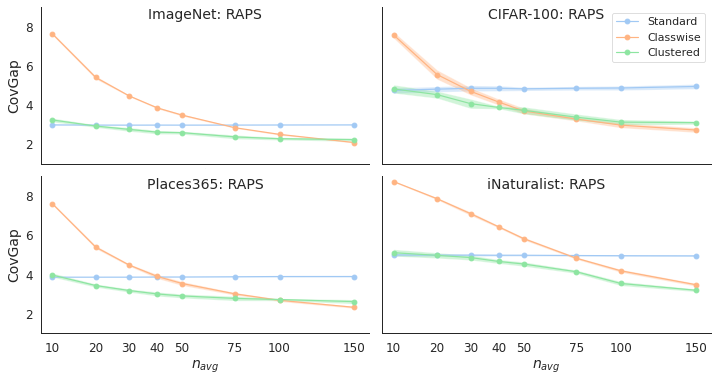

In [11]:
FONT_SIZE = 14
fig_height = 6

metric_list = ['class_cov_gap']
fig_folder = '/home/tding/code/class-conditional-conformal/figs/'

cal_sampling = 'random'
dataset_list = ['imagenet', 'cifar-100', 'places365', 'inaturalist']
score_function = 'RAPS'

nrows = 2
ncols = 2

for metric in metric_list:
    
    fig, axs = plt.subplots(nrows,ncols, 
                gridspec_kw={'wspace':0.04, # Horizontal space between subplots
                             'hspace': 0.08}, # Veritcal space between subplots
                figsize=(12, fig_height)) # Prev: (12,9)

    for i, dataset in enumerate(dataset_list):    

            r = int(np.floor(i/ncols))
            c = i - r*ncols
            ax = axs[r][c]

            aggregated_results = get_metric_df(dataset, cal_sampling, metric, score_function)

            # Plot
            make_line_plot(aggregated_results, ax)
            ax.set_title(f'{dataset_to_name[dataset]}: {score_function}', 
                         fontsize=FONT_SIZE,
                         pad=-(FONT_SIZE)+2) # Shift plot title down


    #         Remove y-ticks except for bottom plots
            if r < nrows - 1:
                ax.set_xticks([])
                ax.set_xlabel('.', fontsize=1) # hacky fix

            # Remove y-ticks and label except for left-most plots
            if c > 0:
                ax.set_yticks([])


            # Set y-label
            if c == 0:
                ax.set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
                
#             AvgSetSize plot adjustments  
#             ax.set_yscale('squareroot') # Use square-root y-axis


#             axs[0].set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
    axs[0, ncols-1].legend(fontsize=FONT_SIZE-3) # Only show legend on right-most plot
    
    save_to = os.path.join(fig_folder, f'RAPS_alldatasets_{cal_sampling}calset_{metric}_height{fig_height}.pdf')
    plt.savefig(save_to, bbox_inches='tight')
    print(f'Saved figure to {save_to}')

    plt.show()

## softmax + APS for all datasets (4x2 grid)

../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=75/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=100/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=150/score=softmax
ImageNet, softmax (random calibration set)
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/imagenet/random_calse

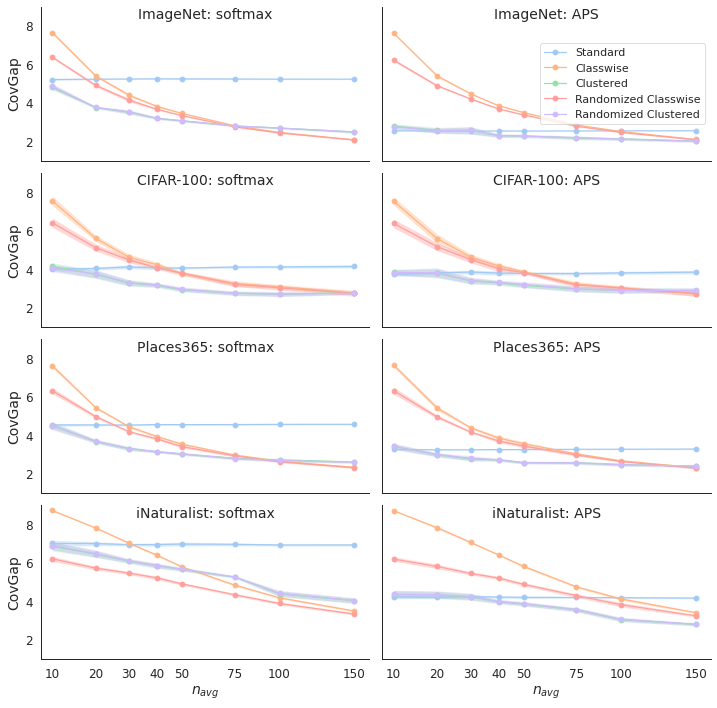

In [12]:
FONT_SIZE = 14
fig_height = 12

# metric_list = ['class_cov_gap', 'avg_set_size', 'very_undercovered']
metric_list = ['class_cov_gap']
fig_folder = '/home/tding/code/class-conditional-conformal/figs/'

cal_sampling = 'random'
dataset_list = ['imagenet', 'cifar-100', 'places365', 'inaturalist']
score_function_list = ['softmax','APS']
method_list = method_to_name.keys()

nrows = len(dataset_list)
ncols = len(score_function_list)

for metric in metric_list:
    
    fig, axs = plt.subplots(nrows,ncols, 
                gridspec_kw={'wspace':0.04, # Horizontal space between subplots
                             'hspace': 0.08}, # Veritcal space between subplots
                figsize=(12, fig_height)) # Prev: (12,9)

    for i, dataset in enumerate(dataset_list):    

        for j, score_function in enumerate(score_function_list):

            ax = axs[i][j]

            aggregated_results = get_metric_df(dataset, cal_sampling, metric, score_function, method_list=method_list)

            # Plot
            make_line_plot(aggregated_results, ax, method_list=method_list)
            ax.set_title(f'{dataset_to_name[dataset]}: {score_function}', 
                         fontsize=FONT_SIZE,
                         pad=-(FONT_SIZE)+2) # Shift plot title down


            # Remove y-ticks except for bottom plots
            if i < nrows - 1:
                ax.set_xticks([])
                ax.set_xlabel('.', fontsize=1) # hacky fix

            # Remove y-ticks and label except for left-most plots
            if j > 0:
                ax.set_yticks([])


            # Set y-label
            if j == 0:
                ax.set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)

    axs[0, ncols-1].legend(fontsize=FONT_SIZE-3, loc='center right') # Only show legend on right-most plot
    
    

    save_to = os.path.join(fig_folder, f'alldatasets_{cal_sampling}calset_{metric}_height{fig_height}.pdf')
    plt.savefig(save_to, bbox_inches='tight')
    print(f'Saved figure to {save_to}')

    plt.show()

## 4 x 3 grids of AvgSetSize and FracUnderCov for all scores

../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=75/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=100/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=150/score=softmax
ImageNet, softmax (random calibration set)
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/imagenet/random_calse

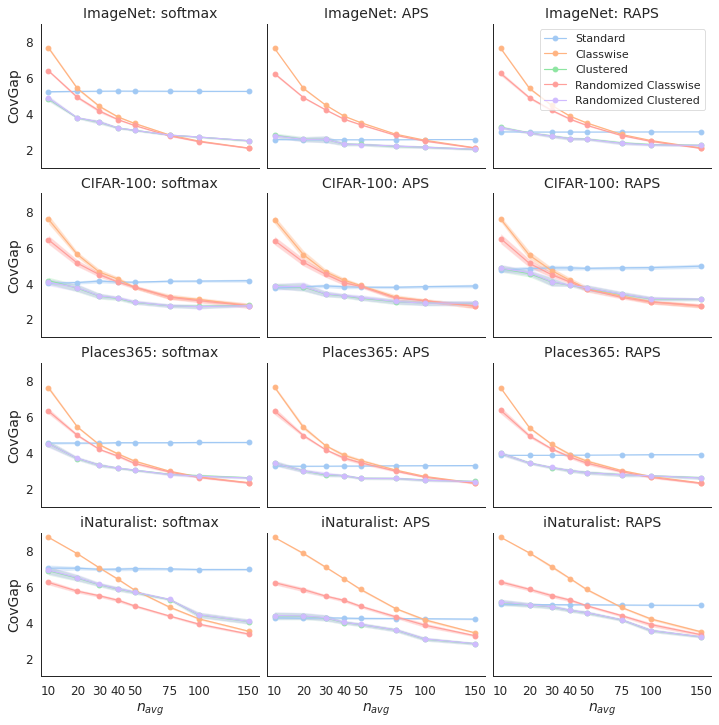

../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=75/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=100/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=150/score=softmax
ImageNet, softmax (random calibration set)
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/imagenet/random_calse

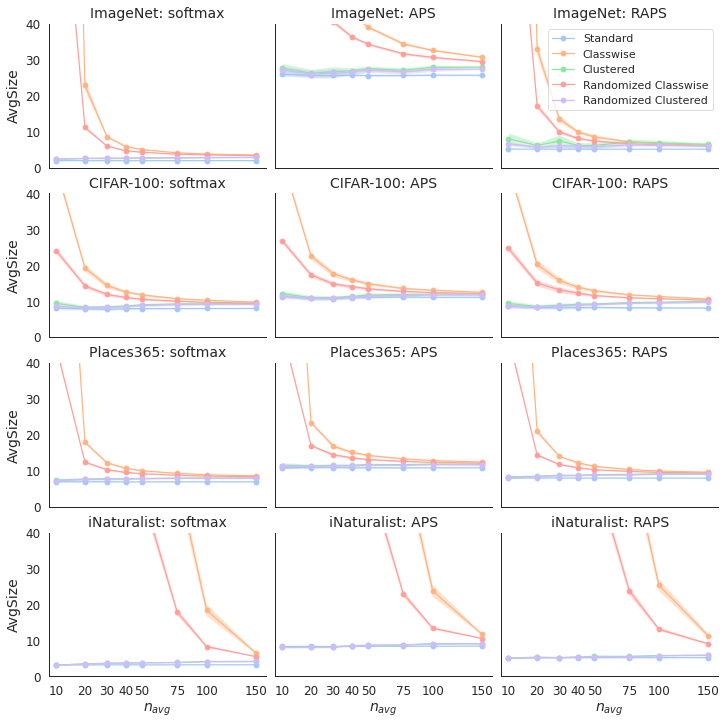

../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=50/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=75/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=100/score=softmax
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=150/score=softmax
ImageNet, softmax (random calibration set)
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=10/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=20/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=30/score=APS
../.cache/paper/varying_n/imagenet/random_calset/n_totalcal=40/score=APS
../.cache/paper/varying_n/imagenet/random_calse

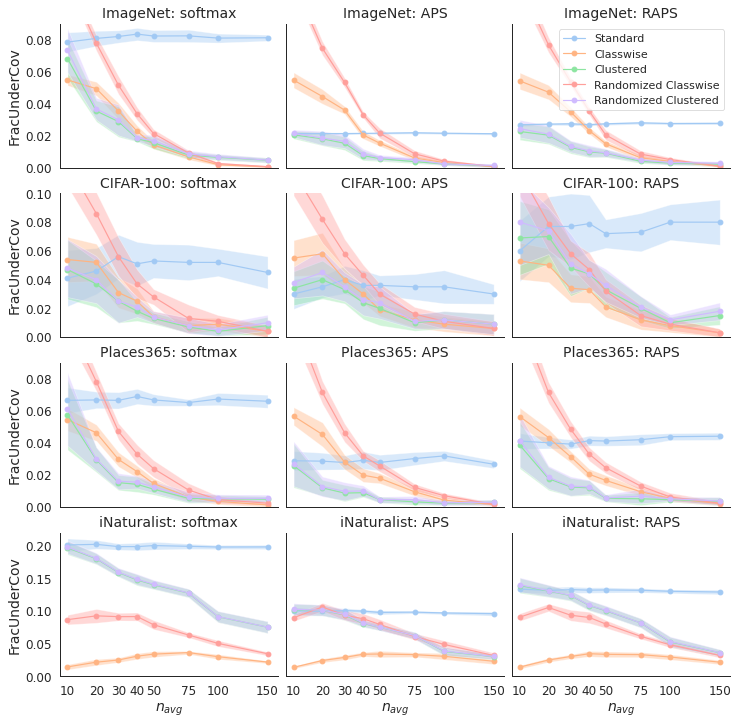

In [13]:
FONT_SIZE = 14
fig_height = 12

# metric_list = ['avg_set_size', 'very_undercovered']
metric_list = ['class_cov_gap', 'avg_set_size', 'very_undercovered']
fig_folder = '/home/tding/code/class-conditional-conformal/figs/'

cal_sampling = 'random'
dataset_list = ['imagenet', 'cifar-100', 'places365', 'inaturalist']
score_function_list = ['softmax','APS', 'RAPS']
method_list = method_to_name.keys()

nrows = len(dataset_list)
ncols = len(score_function_list)

for metric in metric_list:
    
    fig, axs = plt.subplots(nrows,ncols, 
                gridspec_kw={'wspace':0.04, # Horizontal space between subplots
                             'hspace': 0.18}, # Vertical space between subplots
                figsize=(12, fig_height)) # Prev: (12,9)

    for i, dataset in enumerate(dataset_list):    

        for j, score_function in enumerate(score_function_list):

            ax = axs[i][j]

            aggregated_results = get_metric_df(dataset, cal_sampling, metric, score_function, method_list=method_list)

            # Plot
            make_line_plot(aggregated_results, ax, method_list=method_list)
            ax.set_title(f'{dataset_to_name[dataset]}: {score_function}', 
                         fontsize=FONT_SIZE)
#                          pad=-3) # Shift plot title down


            # Remove x-ticks except for bottom plots
            if i < nrows - 1:
                ax.set_xticks([])
                ax.set_xlabel('.', fontsize=1) # hacky fix

            # Remove y-ticks and label except for left-most plots
            if j > 0:
                ax.set_yticks([])


            # Set y-label
            if j == 0:
                ax.set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
                
            # Apply row-by-row adjustments
            if metric == 'avg_set_size':
                ax.set_ylim(0,40)
#                 if dataset == 'imagenet' or dataset == 'places365':
#                     ax.set_ylim(0,450)
#                 if dataset == 'cifar-100':
#                     ax.set_ylim(0,50)
#                 if dataset == 'places365':
#                     ax.set_ylim(0,150)
#                 if dataset == 'inaturalist':
#                     ax.set_ylim(0,400)
            elif metric == 'very_undercovered':
                if dataset == 'imagenet' or dataset == 'places365':
                    ax.set_ylim(0,.09)
                if dataset == 'cifar-100':
                    ax.set_ylim(0,.10)
                if dataset == 'inaturalist':
                    ax.set_ylim(0,.22)
                    
            # For AvgSize
#             if metric == 'avg_set_size':
#                 ax.set_yscale('squareroot') # Use square-root y-axis


    #         axs[0].set_ylabel(metric_to_name[metric], fontsize=FONT_SIZE)
    axs[0, ncols-1].legend(fontsize=FONT_SIZE-3) # Only show legend on right-most plot

    save_to = os.path.join(fig_folder, f'alldatasets_{cal_sampling}calset_{metric}_height{fig_height}.pdf')
    plt.savefig(save_to, bbox_inches='tight')
    print(f'Saved figure to {save_to}')

    plt.show()